In [276]:
import pandas as pd

data = {
    'Nome': ['João', 'Maria', 'Pedro', 'Ana', 'Luiz'],
    'Idade': [25, 30, 22, 28, 35],
    'Cargo': ['Analista', 'Gerente', 'Analista', 'Coordenador', 'Gerente'],
    'Salário': [3500, 5000, 3200, 4800, 5500],
    'Departamento': ['RH', 'Vendas', 'RH', 'TI', 'Vendas']
}

df = pd.DataFrame(data)
df


,Nome,Idade,Cargo,Salário,Departamento
0,João,25,Analista,3500,RH
1,Maria,30,Gerente,5000,Vendas
2,Pedro,22,Analista,3200,RH
3,Ana,28,Coordenador,4800,TI
4,Luiz,35,Gerente,5500,Vendas


Questão 1: Quais são os **nomes e cargos dos funcionários** que têm salário maior ou igual a 5000?

**Aqui podemos realizar uma filtragem simples com o loc ou com condição lógica para os salários iguais ou maiores que 5000**

In [277]:
# Filtragem com o loc
maior_5000_loc = df.loc[df["Salário"] >= 5000]
maior_5000_loc

# Filtragem com condição lógica
maior_5000 = df[df["Salário"] >= 5000]
maior_5000

,Nome,Idade,Cargo,Salário,Departamento
1,Maria,30,Gerente,5000,Vendas
4,Luiz,35,Gerente,5500,Vendas


Questão 2: **Quantos** funcionários com idade **entre 25 e 30 anos** trabalham no departamento de RH?

**Aqui vamos realizar outro filtragem, nesse caso será com 3 condições sendo a idade entre 25 e 30 anos e o departamento sendo RH**

In [278]:
# Aqui tem um erro na verdade
Funcionarios_RH = df.loc[(df["Idade"]>=25) & (df["Idade"]<=30) & (df["Departamento"]=="RH")]
Funcionarios_RH

,Nome,Idade,Cargo,Salário,Departamento
0,João,25,Analista,3500,RH


In [279]:
# Aqui eu consigo saber quantos trabalham no RH
Funcionarios_RH = df.loc[(df["Departamento"] == "RH")]
Funcionarios_RH["Nome"]

0     João
2    Pedro
Name: Nome, dtype: object

Questão 3: Qual é o **salário médio** dos gerentes no departamento de **Vendas**?

**Aqui também teremos que realizar a filtragem dos elementos agora com o departamento == vendas e depois utilizar a função mean()**

In [280]:
Salario_Medio = df.loc[(df["Departamento"] == "Vendas")]
Salario_Medio

,Nome,Idade,Cargo,Salário,Departamento
1,Maria,30,Gerente,5000,Vendas
4,Luiz,35,Gerente,5500,Vendas


In [281]:
Nome_Salario = Salario_Medio[["Salário","Nome"]]
Nome_Salario

,Salário,Nome
1,5000,Maria
4,5500,Luiz


In [294]:
Nome_Salario = Salario_Medio[["Salário", "Nome"]]
media_salarial = Nome_Salario["Salário"].mean()
media_salarial


5250.0

**O uso do groupby da maneira que você mencionou resultará em uma média de salário para cada combinação única de "Nome" e "Departamento". Isso significa que, para cada nome de funcionário e departamento, você obterá a média de seus salários.**

**Se você deseja calcular a média salarial geral, sem levar em consideração o nome ou o departamento, você pode simplesmente calcular a média da coluna "Salário" diretamente, sem usar o groupby**

In [300]:
# Pensei em fazer pelo groupby, porém aqui teremos o salário médio para cada nome e departamento e não de forma geral
media_mensal = Salario_Medio.groupby(["Nome","Departamento"])["Salário"].mean().sum()
media_mensal

10500.0

In [299]:
soma_media = media_mensal.sum()
soma_media

10500.0

**<h2> Exercicios de análise de dados </h2>**

In [ ]:
import pandas as pd
import numpy as np

# Crie um DataFrame de exemplo com dados fictícios de vendas
data = {
    'Data': pd.date_range(start='2023-01-01', periods=100),
    'Loja': np.random.choice(['Norte-Shopping', 'Nova-America', 'Barra-Shopping'], size=100),
    'Produto': np.random.choice(['X', 'Y', 'Z'], size=100),
    'Vendas': np.random.randint(1, 100, size=100),
    'Desconto': np.random.uniform(0, 0.3, size=100)
}

df = pd.DataFrame(data)
df

,Data,Loja,Produto,Vendas,Desconto
0,2023-01-01,Nova-America,Z,85,0.082572
1,2023-01-02,Norte-Shopping,Z,73,0.096358
2,2023-01-03,Nova-America,X,28,0.243726
3,2023-01-04,Barra-Shopping,Y,98,0.265577
4,2023-01-05,Nova-America,Y,46,0.252503
...,...,...,...,...,...
95,2023-04-06,Nova-America,Y,65,0.237054
96,2023-04-07,Norte-Shopping,Y,14,0.040177
97,2023-04-08,Norte-Shopping,X,78,0.234948
98,2023-04-09,Barra-Shopping,Z,83,0.126972


**Como você calcularia a média das vendas mensais para cada loja?**

Como temos que calcular a média mensal, precisamos primeira selecionar as datas pelos meses.

In [ ]:
# criando uma coluna para os meses
df["mês"] = df["Data"].dt.month
df

,Data,Loja,Produto,Vendas,Desconto,mês
0,2023-01-01,Nova-America,Z,85,0.082572,1
1,2023-01-02,Norte-Shopping,Z,73,0.096358,1
2,2023-01-03,Nova-America,X,28,0.243726,1
3,2023-01-04,Barra-Shopping,Y,98,0.265577,1
4,2023-01-05,Nova-America,Y,46,0.252503,1
...,...,...,...,...,...,...
95,2023-04-06,Nova-America,Y,65,0.237054,4
96,2023-04-07,Norte-Shopping,Y,14,0.040177,4
97,2023-04-08,Norte-Shopping,X,78,0.234948,4
98,2023-04-09,Barra-Shopping,Z,83,0.126972,4


In [ ]:
media_mensal = df.groupby(["mês","Loja"])["Vendas"].mean()
media_mensal

mês  Loja          
1    Barra-Shopping    59.000000
     Norte-Shopping    43.000000
     Nova-America      54.444444
2    Barra-Shopping    39.000000
     Norte-Shopping    33.750000
     Nova-America      40.571429
3    Barra-Shopping    36.800000
     Norte-Shopping    58.625000
     Nova-America      54.461538
4    Barra-Shopping    50.000000
     Norte-Shopping    50.000000
     Nova-America      42.000000
Name: Vendas, dtype: float64

In [ ]:
media_mensal = df[["Vendas", "mês", "Loja"]]
media_mensal.groupby(["Loja"])["Vendas"].mean()

Loja
Barra-Shopping    47.818182
Norte-Shopping    45.666667
Nova-America      48.350000
Name: Vendas, dtype: float64

In [ ]:
media_mensal.groupby(["Loja"])["Vendas"].mean()

Loja
Barra-Shopping    47.818182
Norte-Shopping    45.666667
Nova-America      48.350000
Name: Vendas, dtype: float64

Qual foi a loja que teve o maior valor de vendas em um único mês?

In [ ]:
vendas_janeiro = media_mensal[media_mensal["mês"]==1]
vendas_janeiro

,Vendas,mês,Loja
0,85,1,Nova-America
1,73,1,Norte-Shopping
2,28,1,Nova-America
3,98,1,Barra-Shopping
4,46,1,Nova-America
5,87,1,Norte-Shopping
6,23,1,Norte-Shopping
7,3,1,Norte-Shopping
8,19,1,Barra-Shopping
9,82,1,Barra-Shopping


In [ ]:
vendas_janeiro.groupby(["mês","Loja"])["Vendas"].max().sort_values(ascending=False)

mês  Loja          
1    Barra-Shopping    98
     Nova-America      97
     Norte-Shopping    87
Name: Vendas, dtype: int32

Qual foi o mês com o menor valor total de vendas?

In [ ]:
menor_mes = media_mensal.groupby(["mês"])["Vendas"].sum().sort_values()
menor_mes


mês
4     468
2    1072
3    1545
1    1660
Name: Vendas, dtype: int32

Como você filtraria apenas as vendas com desconto superior a 20%?

In [ ]:
desconto_20 = df.loc[df["Desconto"]>0.20]
desconto_20

desconto_20 = df[df["Desconto"]>0.20]
desconto_20

,Data,Loja,Produto,Vendas,Desconto,mês
2,2023-01-03,Nova-America,X,28,0.243726,1
3,2023-01-04,Barra-Shopping,Y,98,0.265577,1
4,2023-01-05,Nova-America,Y,46,0.252503,1
5,2023-01-06,Norte-Shopping,Y,87,0.209892,1
15,2023-01-16,Norte-Shopping,X,5,0.257946,1
19,2023-01-20,Barra-Shopping,X,35,0.220366,1
21,2023-01-22,Norte-Shopping,Y,38,0.233468,1
28,2023-01-29,Barra-Shopping,Z,38,0.203312,1
30,2023-01-31,Barra-Shopping,Z,96,0.235232,1
31,2023-02-01,Nova-America,Y,32,0.228707,2


Como você calcularia as estatísticas resumidas (soma, média e máximo) para cada loja?

In [ ]:
estatisticas_loja = df.groupby([df["Loja"]]).agg({
    'Vendas': ['sum', 'mean', 'max'],
    'Desconto': 'mean'
}).reset_index()

estatisticas_loja

Loja Vendas                 Desconto
                     sum       mean max      mean
0  Barra-Shopping   1578  47.818182  98  0.163471
1  Norte-Shopping   1233  45.666667  98  0.151468
2    Nova-America   1934  48.350000  97  0.159212

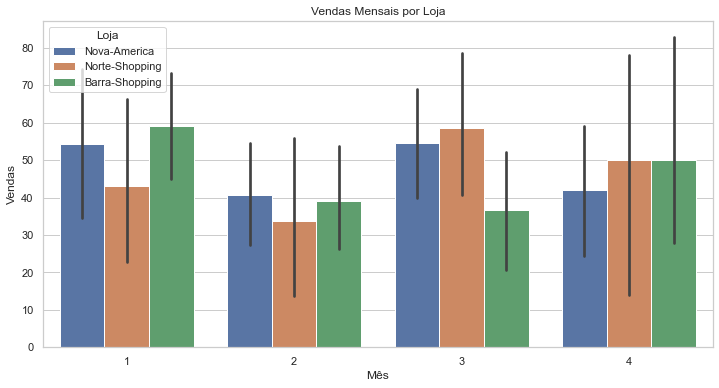

In [ ]:
# 4. Criar um gráfico de barras das vendas mensais por loja
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plot = sns.barplot(x="mês", y="Vendas", hue="Loja", data=df)
plt.title('Vendas Mensais por Loja')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.show()